# Data Science - Decision trees

# Conhecendo o Dataset

## Importando bibliotecas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from os import system
import seaborn as sns
import pydot_ng as pydot
import pydotplus
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from pydot import graph_from_dot_data
from time import process_time
#Daqui pra baixo a importação é diferente do convencional devido as versões do scikitlearn;
#A partir da v0.23 só é possível utilizar sklearn.externals.six dessa forma: (ou fazendo downgrade para versões anteriores)
from six import StringIO
import graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

In [3]:
import warnings
warnings.filterwarnings('ignore') #ou warnings.filterwarnings(action='once')

## O Dataset e o Projeto

### Fonte: [Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) 

### Descrição:

#### Os dois conjuntos de dados estão relacionados com as variantes tinto e branco do vinho "Vinho Verde" português. Para mais detalhes, consulte a referência [Cortez et al., 2009]. Devido a questões de privacidade e logística, apenas variáveis físico-químicas (entradas) e sensoriais (saída) estão disponíveis (por exemplo, não há dados sobre os tipos de uva, marca do vinho, preço de venda do vinho, etc.).

#### Esses conjuntos de dados podem ser vistos como tarefas de classificação ou regressão. As classes são ordenadas e não equilibradas (por exemplo, há muito mais vinhos normais do que excelentes ou pobres).

#### Este conjunto de dados também está disponível no repositório de aprendizado de máquina UCI: https://archive.ics.uci.edu/ml/datasets/wine+quality


### Dados:

#### Variáveis de entrada (com base em testes físico-químicos):

> 1 acidez fixa

> 2 acidez volátil

> 3 ácido cítrico

> 4 açúcar residual

> 5 cloretos

> 6 dióxido de enxofre livre

> 7 dióxido de enxofre total

> 8 densidade

> 9 pH

> 10 sulfatos

> 11 álcool

####  Variável de saída (com base em dados sensoriais):

> 12 qualidade (pontuação entre 0 e 10)

## Leitura dos dados

In [4]:
wine = pd.read_csv('winequality-red.csv')
wine2 = pd.read_csv('winequality-red.csv')

## Verifica a ocorrência de valores faltantes

In [5]:
print("Valores faltantes:", wine.isnull().values.any())

Valores faltantes: False


## Visualizando os dados:

In [6]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Verificando o tamanho do dataset

In [7]:
wine.shape

(1599, 12)

## Visualizando as colunas

In [8]:
print(wine.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


## Visualizando as informações sobre o dataset

In [9]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


# Análises Preliminares

## Estatísticas descritivas

In [10]:
wine.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


## Histograma para visualização da distribuição de frequências das colunas 

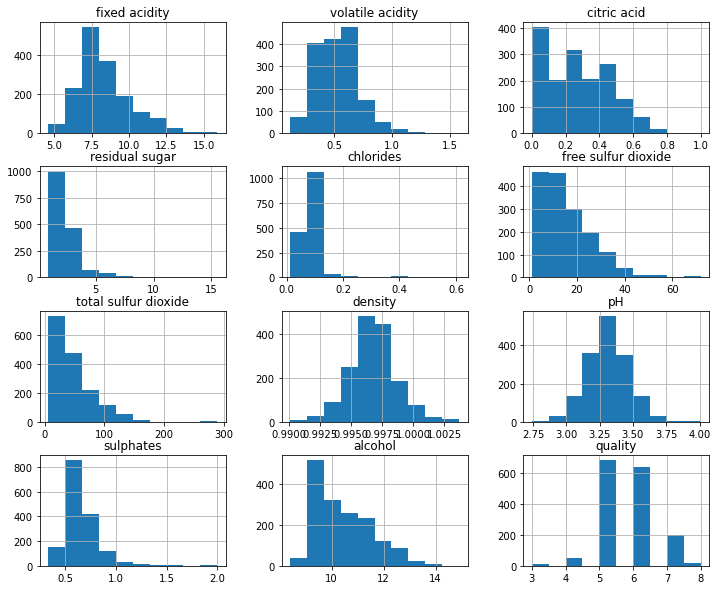

In [11]:
wine.hist(figsize=(12, 10))
plt.show()

## Dropando a coluna "quality" do dataset "wine2", pois quality é nosso fator de classificação

In [12]:
del wine2['quality']

## Matriz de correlação

> O coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre -1 e +1 sendo que -1 indica associação negativa perfeita e +1 indica associação positiva perfeita.

> Em modelos de regressão linear, é importante verificarmos se as variáveis explicativas (X's) têm forte correlação com a variável dependente (Y) e se as variáveis explicativas (X's) não tenham forte correlação entre si.

In [13]:
wine2.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


## A variável "corr" recebe a matriz de correlação acima. 

In [14]:
corr = wine2.corr()   

## A variável "mask" recebe o método de criação de uma máscara para "esconder" os dados da matriz de correlação que não são interessantes para nossa análise preliminar.

In [15]:
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

## Plot da matriz de correlação utilizando heatmap, após a aplicação da máscara.

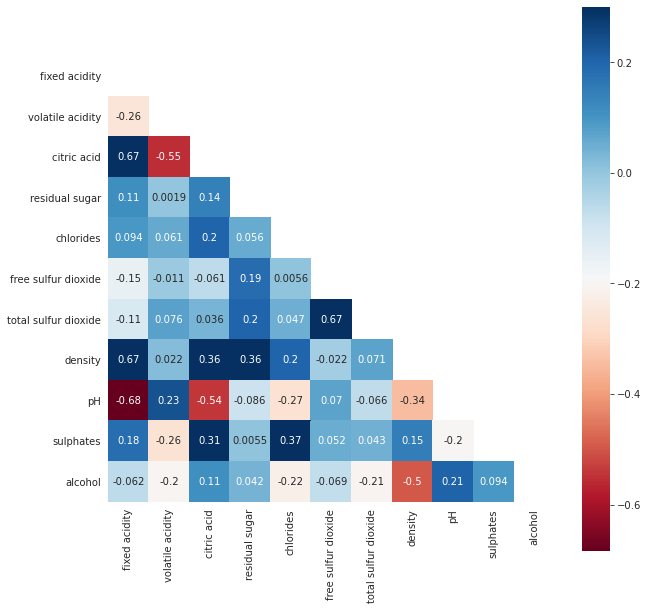

In [16]:
with sns.axes_style("white"):

    ax = plt.subplots(figsize=(10, 10))

    ax = sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=.3, square=True, annot=True)

# <font color='red' style='font-size: 30px;'>Tranformando os rótulos</font>
<hr style='border: 2px solid blue;'>

## Qual o motivo da transformação dos rótulos?

> Como a qualidade está como numeral e precisa ser nominal para a classificação, é preciso classificar o vinho como apenas ruim ou bom, dessa forma, é definido um intervalo na variação que antes era de 2 a 8 em uma classificação binária, agora os vinhos de 2 a 6.5 serão classificados como ruins e os vinhos acima de 6.6 serão classificados como bons sendo: ruins = 0 e bons = 1

In [17]:
bins = (2, 6.5, 8)
group_names = ['ruim', 'bom']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

## Criando um codificador para converter a qualidade para numeral(0 e 1)

In [18]:
label_quality = LabelEncoder()

## Vinhos bons se tornarão 0 enquanto os ruins serão identificados por 1

In [19]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [20]:
num_true = len(wine.loc[wine['quality'] == 0])
num_false = len(wine.loc[wine['quality'] == 1])

## Print da porcentagem existente de vinhos "bons" e "ruins"

In [21]:
print("Vinhos bons:  {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("vinhos ruins: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Vinhos bons:  217 (13.57%)
vinhos ruins: 1382 (86.43%)


# Plotando os gráficos

## Relação quality x volatile acidity

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

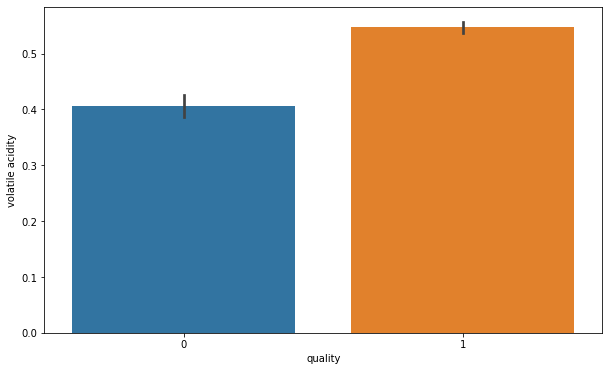

In [22]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

## Relação quality x citric acid

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

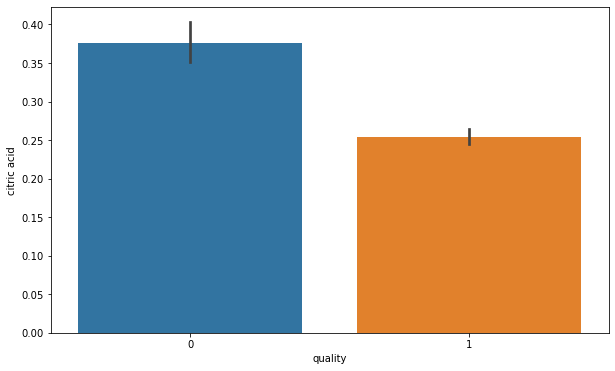

In [23]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

## Relação quality x chlorides

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

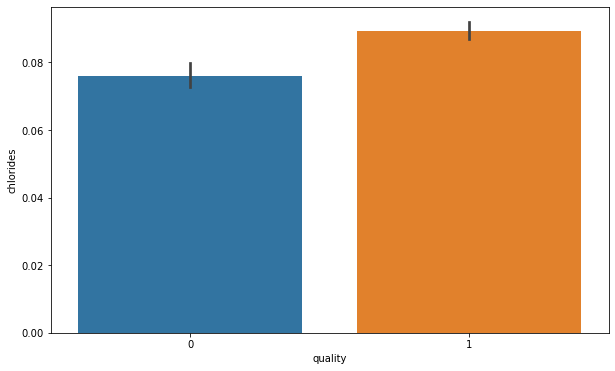

In [24]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

## Relação quality x free sulfur dioxide

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

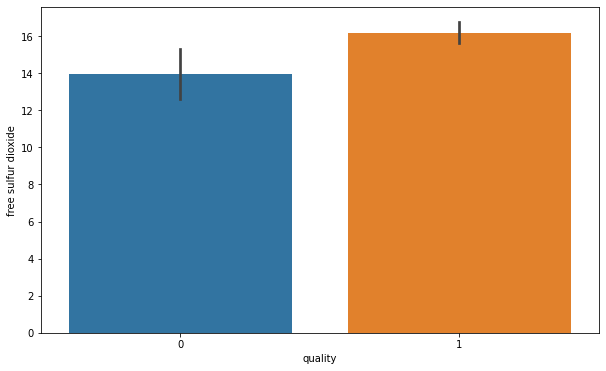

In [25]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

## Relação quality x total sulfur dioxide

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

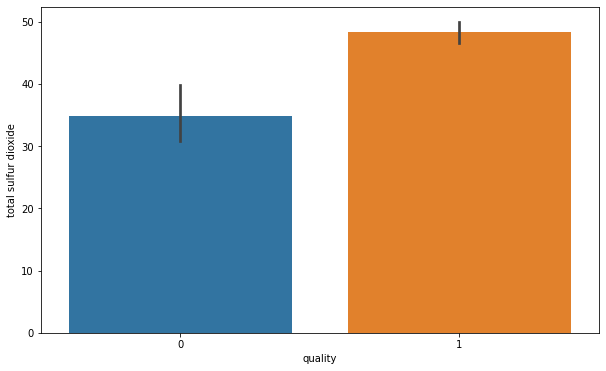

In [26]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

## Relação quality x alcohol

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

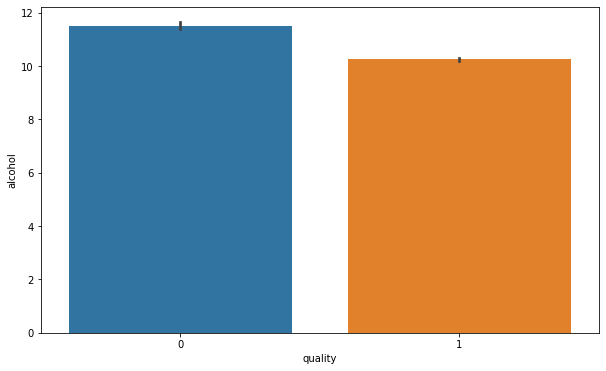

In [27]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## Relação quality x sulphates

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

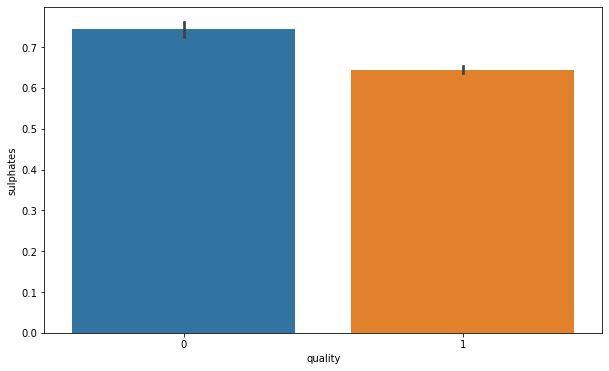

In [28]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

## Relação quality x sulphates

<AxesSubplot:xlabel='quality', ylabel='pH'>

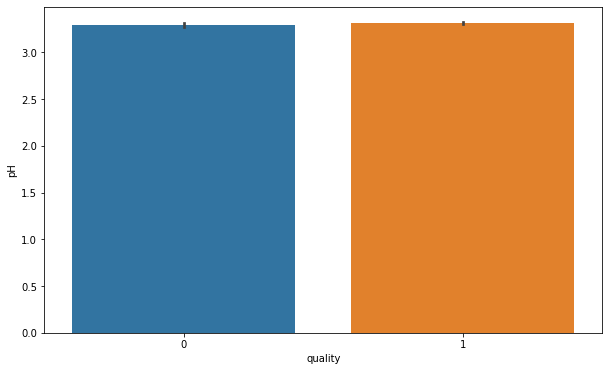

In [29]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = wine)

## Relação quality x quantidade

<AxesSubplot:xlabel='quality', ylabel='count'>

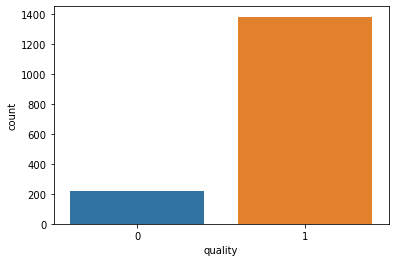

In [30]:
sns.countplot(wine['quality'])

## Divisão dos vetores de caracteristicas e rótulos

In [31]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

## Divisão do dataset: 75% para treino, 25% para teste

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [33]:
print("Quantidade de amostras no treino: {0:0.2f}% ".format((len(X_train)/len(wine.index)) * 100))
print(X_train.shape)
print(y_train.shape)

Quantidade de amostras no treino: 74.98% 
(1199, 11)
(1199,)


In [34]:
print("Quantidade de amostras no teste: {0:0.2f}%".format((len(X_test)/len(wine.index)) * 100))
print(X_test.shape)
print(y_test.shape)

Quantidade de amostras no teste: 25.02%
(400, 11)
(400,)


# Classificação com Naive Bayes Gassian e Decision Tree

## Instanciando o classificador Gaussiano

In [35]:
nbc =  GaussianNB()

## Treinamento do classificador

In [36]:
nbc.fit(X_train, y_train)

GaussianNB()

## Nosso "X_test" é passado para o método predict() e a previsão é armazenada na variável "pred_nbc"

In [37]:
pred_nbc = nbc.predict(X_test)

## Cálculo da acurácia para a classificação usando o método accuracy_score()

In [38]:
acuracia_nbc = accuracy_score(y_test, pred_nbc)
print("Acurácia:", acuracia_nbc)

Acurácia: 0.8525


## Precisão, recall e support com o método classification_report()

In [39]:
print(classification_report(y_test, pred_nbc))

              precision    recall  f1-score   support

           0       0.47      0.75      0.58        53
           1       0.96      0.87      0.91       347

    accuracy                           0.85       400
   macro avg       0.71      0.81      0.74       400
weighted avg       0.89      0.85      0.87       400



## Matriz de confusão

In [40]:
print(confusion_matrix(y_test, pred_nbc))

[[ 40  13]
 [ 46 301]]


## Aplicação da validação cruzada no classificador GaussianNB
> A validação cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados. Esta técnica é amplamente empregada em problemas onde o objetivo da modelagem é a predição.

In [41]:
nbc_eval = cross_val_score(estimator = nbc, X = X_train, y = y_train, cv = 10)
print("Media da validação cruzada do classificador GaussianNB", nbc_eval.mean())

Media da validação cruzada do classificador GaussianNB 0.8373459383753501


## Instanciando o classificador da árvore de decisão

In [42]:
tree_dtc = DecisionTreeClassifier()

## Treinando o classificador 

In [43]:
tree_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

## Nosso "X_test" é passado para o método predict() e a previsão é armazenada na variável "pred_dtc"

In [44]:
pred_dtc = tree_dtc.predict(X_test)

## Cálculo da acurácia para a classificação usando o método accuracy_score()

In [45]:
acuracia_dtc = accuracy_score(y_test, pred_dtc)
print("Acurácia Decision Tree:", acuracia_dtc)

Acurácia Decision Tree: 0.8775


## Precisão, recall e support com o método classification_report()

In [46]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.53      0.64      0.58        53
           1       0.94      0.91      0.93       347

    accuracy                           0.88       400
   macro avg       0.74      0.78      0.75       400
weighted avg       0.89      0.88      0.88       400



## Aplicação da validação cruzada no classificador da Árvore de Decisão

In [47]:
dtc_eval = cross_val_score(estimator = tree_dtc, X = X_train, y = y_train, cv = 10)
print("Media da validação cruzada do classificador CART", dtc_eval.mean())

Media da validação cruzada do classificador CART 0.8741036414565826


## l_columns recebe as colunas do dataset "wine2"

In [48]:
l_columns = wine2.columns

## Salvando o pdf com a árvore de decisão

[graphviz](https://graphviz.org/)

[pydotplus](https://riptutorial.com/python/example/29348/pydotplus)

In [49]:
dot_data = export_graphviz(tree_dtc,
                           feature_names=l_columns,
                           out_file=None,
                           filled=True,
                           rounded=True)

#Export to pdf
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_pdf('tree.pdf')

True

## Salvando a png com a árvore de decisão

In [54]:
dot_data = export_graphviz(tree_dtc,
                           feature_names=l_columns,
                           out_file=None,
                           filled=True,
                           rounded=True)

#Export to pdf
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree.png')

True

## Plotando a curva ROC

> A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.

> Uma curva ROC traça “True Positive Rate vs. False Positive Rate” em diferentes limiares de classificação.

## Armazenando os dados que serão utilizados no plot da curva ROC a Decision Tree e para o Naive Bayes Gaussian

In [51]:
pred_dtc = tree_dtc.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, pred_dtc)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, pred_dtc)

In [52]:
pred_nbc = nbc.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, pred_nbc)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, pred_nbc)

## Plot da curca ROC - Decision Tree e Gaussian

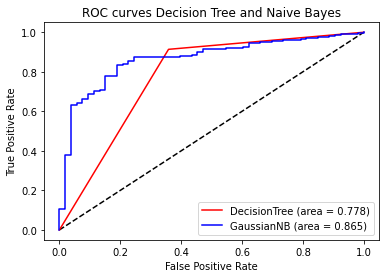

In [53]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Tree, tpr_Tree, color='red', label='DecisionTree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_nb, tpr_nb, color='blue', label='GaussianNB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves Decision Tree and Naive Bayes')
plt.legend(loc='best')
plt.show()

# Resultados Obtidos

### Resultado da classificação:

| Classificador | Acurácia | f1-score |
| :--- | :---: | :---: |
| NB Gaussian | 0.8525 | 0.85 |
| Decision Tree | 0.8975 | 0.90 |

### Área da curva ROC: 

| Classificador | Area |
| :--- | :---: |
| NB Gaussian | 0.865 |
| Decision Tree | 0.805 |

# Conclusões:

## Sobre os algoritmos:
> Os dois algoritmos, Decision Tree e Gaussiano, se mostraram eficientes, pois ambos atingiram 0.85%+ de acurácia na classificação.

## Sobre o dataset:
> Apenas 13% do vinho foi classificado como bom. Se olharmos para a matriz de confusão, podemos ver que a maior taxa de erro de classficação foi em relação ao vinhos bons, acredito que se o dataset fosse um pouco mais extenso, a classificação provavelmente seria melhor, afinal haveriam mais dados para treinamento.  